# Live Code 3: Mendeteksi Anomali pada Transaksi Suatu Produk Liquor IOWA 

Nama: Ikhbar Firman Hanafi

Batch: 14

Phase: 0

## Problem Statement
IOWA merupakan salah satu perusahaan penjual Liquor ternama. Pada suatu hari terdapat 5000 transaksi yang terjadi di satuu ntuk suatu produk. Tim marketing menduga ada suatu keanehan atau anomali pada data transaksi.

## Obejctive
Mengetahui ada atau tidaknya anomali transaksi liquor suatu produk

## Deskripsi Data

Data yang digunakan adalah data iowa sales liquor `bigquery-public-data.iowa_liquor_sales.sales` diakses menggunakan bigquery-public-data pada Google Cloud Big Query.

### **Data query**

SELECT sale_dollars 

FROM `bigquery-public-data.iowa_liquor_sales.sales` 

LIMIT 5000;

## Working Area

### Data Preparation

Import library yang diperlukan

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
import scipy.stats as stats

Load data menjadi suatu DataFrame

In [94]:
data = pd.read_csv('h8dsft_P0LC3_ikhbar_firman.csv')

In [95]:
data.head() # Menampilkan 5 baris pertama pada data

,sale_dollars
0,281.34
1,814.20
2,150.00
3,486.00
4,3596.40


In [96]:
data.tail() # Menampilkan 5 baris terakhir pada data

,sale_dollars
4995,31.86
4996,50.36
4997,91.44
4998,4177.92
4999,587.16


Sebelumnya kita cek terlebih dahulu apakah terdapat missing value pada dataset kita.

In [97]:
data.isnull().any()

sale_dollars    False
dtype: bool

Dari 5000 sales data liquor tidak terdapat missing value.

### Perhitungan Central Tendency Data

Dalam pengecekan anomali suatu data, pertama kita akan coba cari beberapa parameter central tendency data seperti mean, median , dan modus.

In [98]:
mean_data = data.mean()[0] # Mean data sale dollars
median_data = data.median()[0] # Median data sale dollars
mode_data = data.mode().iloc[0] # Modus data sale dollars (data dengan frekuensi terbanyak)
print(f'Mean:{mean_data}, Median: {median_data}, Modus: {mode_data}')

Mean:619.2825679999986, Median: 126.0, Modus: sale_dollars    45.72
Name: 0, dtype: float64


Mean atau rata-rata dari 5000 sales liquor adalah $619.28, dimana terdapat perbedaan yang jauh dengan nilai tengah data(median) $126 dan sales terbanyak sebesar $45.72 (modus). Diduga data memiliki nilai outliers atau beberapa sales dengan nilai yang besar pada distribusi data (outliers) karena nilai mean yang jauh lebih besar dari median dan modus.

### Skewness Data dan Distribusi Data

Kita akan coba cek skewness dari data sale dollars.

In [99]:
skew_ = round(data['sale_dollars'].skew(),2)
skew_

10.66

Data sale dololars disini memiliki skewness positive atau right skewed dengan skewness sebesar 10.66.

Untuk lebih mudahnya data 5000 sales liquor dapat dilihat dari grafik histogram dan boxplot berikut:

Text(0.5, 1.0, '5000 Sales liquor')

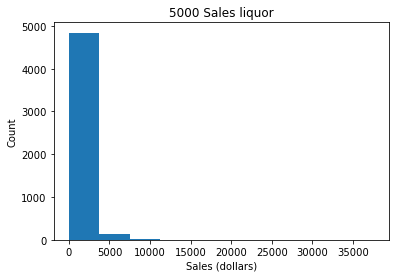

In [100]:
plt.hist(data, density=False)
plt.xlabel('Sales (dollars)')
plt.ylabel('Count')
plt.title('5000 Sales liquor')

<AxesSubplot:>

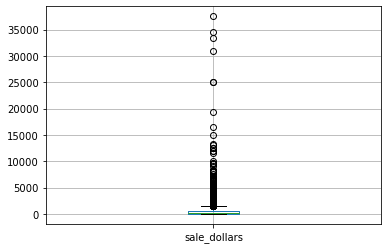

In [101]:
data.boxplot() #boxplot dari data sale_dollars

Dapat kita lihat dari grafik histogram dan boxplot di atas sebagian besar atau hampir keseluruhan dari 5000 sales transaksi sales berada di bawah $5000. Maka dapat dikatakan terdapat beberapa transaksi yang agak berbeda  atau jauh lebih besar (karena data right skewed) dari biasanya.

### Mendeteksi Outliers dengan Extreme Value Analysis

Untuk mencari tranksaksi yang jauh lebih besar dari biasanya atau dapat dikatakan outlier dari data sales, kita akan terapkan **extreme value analysis**, dimana sale yang dikatakan oulier berada di daerah *upper boundary* dan *lower boundary*.

Upper boundary area : sale  $\ge q_3+1.5IQR$

Lower boundary area: sale $\le q_1-1.5IQR$

- $q_1$: 25th quantile
- $q_2$: 50th quantile (median)
- $q_3$: 75th quantile

Langkah pertama kita coba cari masing-masing kuartil $(q_1,q_2,q_3)$ beserta IQR.

In [102]:
q1 = data.quantile(0.25)[0]
q2 = data.quantile(0.5)[0]
q3 = data.quantile(0.75)[0]
iqr = q3-q1
print(f'Kuartil bawah data sale liquor adalah ${q1}')
print(f'Kuartil tengah atau median data sale liquor adalah ${q2}')
print(f'Kuartil atas data sale liquor adalah ${q3}')
print(f'Jangkauan kuartil IQR data sale liquor adalah ${iqr}')

Kuartil bawah data sale liquor adalah $44.08
Kuartil tengah atau median data sale liquor adalah $126.0
Kuartil atas data sale liquor adalah $614.34
Jangkauan kuartil IQR data sale liquor adalah $570.26


### Membuat DataFrame baru tanpa outliers

Kita akan coba membuat filter untuk melokasi outliers dengan kriteria sale  $\ge q_3+1.5IQR$ atau sale $\le q_1-1.5IQR$  dan membuat data baru tanpa outliers tersebut dengan langkah sebagai berikut:

In [103]:
outliers_filter = (data['sale_dollars'] < q1-1.5*iqr) | (data['sale_dollars'] > q3+1.5*iqr) #Filter melokasi outliers
data_rmv_outliers = data[~outliers_filter] # Membuat dataFrame baru tanpa outliers

Kita coba cek mean dan median data sebelum dan sesudah remove outliers.

In [104]:
median_data_nooutliers =data_rmv_outliers.median()[0]
print(f'Median data sale seblumnya ${median_data}, sedangkan median data tanpa ouliers adalah ${median_data_nooutliers}')

Median data sale seblumnya $126.0, sedangkan median data tanpa ouliers adalah $99.0


In [105]:
mean_data_nooutliers =data_rmv_outliers.mean()[0]
print(f'Mean data sale seblumnya ${mean_data}, sedangkan mean data tanpa ouliers adalah ${mean_data_nooutliers}')

Mean data sale seblumnya $619.2825679999986, sedangkan mean data tanpa ouliers adalah $272.1418199955633


Terlihat perubahan yang pesat pada nilai mean data sale sebelum dan sesudah remove outliers. Hal tersebut dikarenakan parameter mean sensitif terhadap outliers, dimana pada data kita disini terdapat outliers yang dapat menggeser value mean setelah outliers tersebut dihilangkan, berbeda dengan median yang tidak sensitif terhadap outliers atau valuenya tidak begitu berubah dengan ada atau tanpa outliers.

Untuk menarik kesimpulan perbedaan data sebelum dan sesudah dihilangkan outliers kita akan lakukan analisa statistik inferensia uji hipotesis.

### Uji Hipotesis

Kita akan coba mengetahui apakah terdapat perbedaan data sampel  sale dollars dengan populasi (dimana data sampel disini adalah dataset observasi yang telah di remove outliers) dengan menggunakan uji hipotesis **One sample two tailed t-test** dengan dengan  parameter mean, sample mean $272.14 ,significance level pada pengujian ini sebesar 0.05, dan kriteria pengambilan keputusan adalah:
- Accept $H_0$ apabila *p-value* $>0.05$
- Reject $H_0$ apabila *p-value* $<0.05$

Hipotesis dalam kasus disini adalah:
1. Tidak terdapat perbedaaan yang signifikan antara data sampel dan populasi
2. Terdapat perbedaaan yang signifikan antara data sampel dan populasi

Atau dapat ditulis sebagai berikut:

- $H_0:\mu=619.3$

- $H_1:\mu \neq 619.3$

Untuk menarik kesimpulan kita akan mencari nilai *p-value* yang akan dibandingkan dengan significance level 0.05.

In [106]:
t_stat,p_val = stats.ttest_1samp(data_rmv_outliers.sale_dollars, 619.3)
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.0
t-statistics: -70.43770988166787


Karena  nilai *p-value* adalah 0 yanng mana lebih kecil dari 0.05, maka keputusan yang diambil adalah **reject  null hypothesis**. Dapat disimpulkan bahwa terdapat perbedaan yang cukup signifikan antara data sampel dengan populasi.

## Questions

#### 1. Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu!

In [107]:
mean_data = data.mean()[0] # Mean data sale dollars
median_data = data.median()[0] # Median data sale dollars
mode_data = data.mode().iloc[0] # Modus data sale dollars (data dengan frekuensi terbanyak)
print(f'Mean:{mean_data}, Median: {median_data}, Modus: {mode_data}')

Mean:619.2825679999986, Median: 126.0, Modus: sale_dollars    45.72
Name: 0, dtype: float64


Mean atau rata-rata dari 5000 sales liquor adalah $619.28, dimana terdapat perbedaan yang jauh dengan nilai tengah data(median) $126 dan sales terbanyak sebesar $45.72 (modus). Dapat dikatakan data memiliki nilai outliers atau beberapa sales dengan nilai yang besar pada distribusi data (outliers) karena nilai mean yang jauh lebih besar dari median dan modus. Untuk lebih jelasnya dapat dilihat dari grafik histogram, boxplot dan nilai parameter skew data.

#### 2. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu!

In [108]:
print(f'Nilai skew dari 5000 data sales liqour adalah {skew_}.')

Nilai skew dari 5000 data sales liqour adalah 10.66.


Dari perhitungan didapat nilai skew data positif sebesar 10.66. Oleh karena itu data sales liquor tidak berdistribusi normal (berdistribusi normal apabila skew mendektai 0) tergolong positive skewneess atau right skewed.

#### 3. Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data!

Teknik yang digunakan untuk extreme value analysis disini adalah dengan mencari upper boundary dan lower boundary berdasarkan kuartil $(q_1,q_2,q_3)$ dan jangkauan kuartil IQR. Hal tersebut dikarenakan data tidak berdistribusi normal atau skewed ditribution.

Upper boundary area : sale  $\ge q_3+1.5IQR$

Lower boundary area: sale $\le q_1-1.5IQR$

- $q_1$: 25th quantile
- $q_2$: 50th quantile (median)
- $q_3$: 75th quantile

#### 4. Ada berapa banyak data yang merupakan outlier? apakah cukup signifikan jumlahnya? (anggap bahwa jumlah signifikan lebih dari 50%).

In [109]:
outliers_count = sum(outliers_filter)
outliers_rate = (outliers_count/len(data))
print(f'Terdapat outliers sejumlah {outliers_count} atau {outliers_rate*100}% outliers dari 5000 sales liquor data')

Terdapat outliers sejumlah 489 atau 9.78% outliers dari 5000 sales liquor data


Terdapat sales yang dikatakan outliers sebanyak 489 dari 5000 sales liquor, yakni 9.78%. Maka dapat dikatakan jumlahnya tidak signifikan karena dibawah 50% jumlah data.

#### 5. Setelah kamu menyingkirkan outlier dari data dan melakukan uji hipotesis, apakah ada perbedaan yang signifikan? jelaskan jawabanmu

Berdasarkan hasil uji hipotesis **One sample two tailed t-test** didapat nilai *p-value* adalah 0 yanng mana lebih kecil dari significance level yang digunakan 0.05, maka keputusan yang diambil adalah **reject  null hypothesis**. Dapat disimpulkan bahwa terdapat perbedaan yang cukup signifikan antara data sampel dengan populasi. Hal tersebut dikarenakan kita melakukkan uji hipotesis dengan parameter mean, sebagaimana parameter mean sensitif nilainya terhadap outliers.

## Kesimpulan

Berdasarkan hasil analisis data bahwa terdapat 489 transaksi atau 9.78% dari 5000 sales suatu produk liquor IOWA yang tergolong *unusual*. Jumlah transaksi tersebut terbilang tidak begitu signifkan (kurang dari 50%) dan masih terbilang wajar. Mungkin bisa jadi terdapat suatu event besar (misalkan suatu pesta) yang mana dapat membeli produk tersebut dalam suatu hari, untuk lebih jelasnya bisa diselidiki kembali ID transaksi dan info pelanggan untuk dihubungi lebih lanjut.